## Predict number of days taken to receive a Visa - H1B and EB ##
 ### Given job type, nationality, location ###
 ### Use data from 2001 - 2016 ####
 
 ### Motivation: Useful to US department of Labor Force in terms of how much resources to allocate if a particular class of visa takes much longer to get approved. Also useful for job applicants and immigrants on how much time to keep in mind before applying for visa, where to apply from, the types of jobs available ###
 
#### gives indication of what the job market is like ####
#### could be used to look at how economic prosperity of country affects number of people applying for visas from that country ####

In [1]:
#import pandas as pd
#import time
#import matplotlib.pyplot as plt
#import numpy as np
#import seaborn as sns

#%matplotlib inline

#start_time = time.time()
# Get the data
#h1b = pd.read_csv('PERM_FY2015.csv', parse_dates=['DECISION_DATE', 'CASE_RECEIVED_DATE'], usecols = ['CASE_NUMBER', 'DECISION_DATE', 'CASE_STATUS', 'CASE_RECEIVED_DATE']) 
#perm = pd.read_csv('PERM_FY2015.csv', parse_dates=['DECISION_DATE', 'CASE_RECEIVED_DATE'], usecols = ['CASE_NUMBER', 'DECISION_DATE', 'CASE_STATUS', 'CASE_RECEIVED_DATE','EMPLOYER_NAME', 'EMPLOYER_POSTAL_CODE', 'PW_SOC_TITLE', 'PW_LEVEL_9089','WAGE_OFFER_FROM_9089', 'WAGE_OFFER_UNIT_OF_PAY_9089', 'JOB_INFO_WORK_CITY', 'JOB_INFO_WORK_STATE', 'JOB_INFO_WORK_POSTAL_CODE','COUNTRY_OF_CITIZENSHIP', 'CLASS_OF_ADMISSION'])
#perm_all = pd.read_csv('PERM_FY2015.csv', parse_dates=['DECISION_DATE', 'CASE_RECEIVED_DATE'])

# Save the data
#perm.to_pickle('perm') #2015 data, few columns
#perm_all.to_pickle('perm_all')# 2015 data, all columns

#perm_15 = pd.read_pickle('perm')
#perm_all_15 = pd.read_pickle('perm_all')

#pd.set_option('display.max_rows', len(perm_all_15.columns))
#pd.set_option('display.max_columns', len(perm_all_15.columns))

#print "My program took", time.time() - start_time, "to run"
#perm_15.head()


NameError: name 'perm_all' is not defined

In [3]:
import pandas as pd
import glob
import time
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#import plotly 
#import plotly.plotly as py
#import plotly.graph_objs as go
#import plotly.tools as tls
import us
import os
#plotly.tools.set_credentials_file(username='sneharavi15', api_key='w4b8nbp3q7')
#perm15 = pd.read_csv('PERM_FY2015.csv', parse_dates=['DECISION_DATE', 'CASE_RECEIVED_DATE'], usecols = ['CASE_NUMBER', 'DECISION_DATE', 'CASE_STATUS', 'CASE_RECEIVED_DATE','EMPLOYER_NAME', 'EMPLOYER_POSTAL_CODE', 'PW_SOC_TITLE', 'PW_LEVEL_9089','WAGE_OFFER_FROM_9089', 'WAGE_OFFER_UNIT_OF_PAY_9089', 'JOB_INFO_WORK_CITY', 'JOB_INFO_WORK_STATE', 'JOB_INFO_WORK_POSTAL_CODE','COUNTRY_OF_CITIZENSHIP', 'CLASS_OF_ADMISSION'])
#perm15.to_pickle('perm15')
#perm_15 = pd.read_pickle('perm15')

path = os.getcwd()
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
     
    df.columns = [x.replace(' ', '_') for x in df.columns]
    if 'COUNTRY_OF_CITZENSHIP' in df.columns:
        df = df.rename(columns={'COUNTRY_OF_CITZENSHIP': 'COUNTRY_OF_CITIZENSHIP'})
    if 'CASE_NO' in df.columns:
        df = df.rename(columns={'CASE_NO': 'CASE_NUMBER'})
    if 'WAGE_OFFERED_FROM_9089' in df.columns:
        df = df.rename(columns={'WAGE_OFFERED_FROM_9089': 'WAGE_OFFER_FROM_9089'})
    if 'FINAL_CASE_STATUS' in df.columns:
        df = df.rename(columns={'FINAL_CASE_STATUS': 'CASE_STATUS'})
    if 'RECEIVED_DATE' in df.columns:
        df = df.rename(columns={'RECEIVED_DATE': 'CASE_RECEIVED_DATE'})
    if 'ALIEN_CITIZENSHIP_COUNTRY' in df.columns:
        df = df.rename(columns={'ALIEN_CITIZENSHIP_COUNTRY': 'COUNTRY_OF_CITIZENSHIP'})
    if 'PREVAILING_WAGE_JOB_TITLE' in df.columns:
        df = df.rename(columns={'PREVAILING_WAGE_JOB_TITLE': 'PW_JOB_TITLE_9089'})
    if 'PREVAILING_WAGE_LEVEL' in df.columns:
        df = df.rename(columns={'PREVAILING_WAGE_LEVEL': 'PW_LEVEL_9089'})  
    if 'WAGE_OFFERED_FROM' in df.columns:
        df = df.rename(columns={'WAGE_OFFERED_FROM': 'WAGE_OFFER_FROM_9089'}) 
    if 'WAGE_PER' in df.columns:
        df = df.rename(columns={'WAGE_PER': 'WAGE_OFFER_UNIT_OF_PAY_9089'})
    if 'WAGE_OFFERED_UNIT_OF_PAY_9089' in df.columns:
        df = df.rename(columns={'WAGE_OFFERED_UNIT_OF_PAY_9089': 'WAGE_OFFER_UNIT_OF_PAY_9089'})
    if file_ == 'C:\Users\Sneha\Dropbox\PythonProjects\Visa\PERM_FY2013.csv':
        df['WAGE_OFFER_UNIT_OF_PAY_9089'] = df['PW_UNIT_OF_PAY_9089']
    list_.append(df)
frame = pd.concat(list_, keys=['08', '09', '10', '11', '12', '13', '14', '15', '16'])
#frame[['CASE_NUMBER',  'DECISION_DATE', 'CASE_STATUS', 'CASE_RECEIVED_DATE','EMPLOYER_NAME', 'PW_JOB_TITLE_9089', 'PW_LEVEL_9089','WAGE_OFFER_FROM_9089', 'WAGE_OFFER_UNIT_OF_PAY_9089', 'JOB_INFO_WORK_CITY', 'JOB_INFO_WORK_STATE','COUNTRY_OF_CITIZENSHIP', 'CLASS_OF_ADMISSION']]
#frame.loc['08'][['CASE_NUMBER',  'DECISION_DATE', 'CASE_STATUS', 'CASE_RECEIVED_DATE','EMPLOYER_NAME',  'PW_JOB_TITLE_9089', 'PW_LEVEL_9089','WAGE_OFFER_FROM_9089', 'WAGE_OFFER_UNIT_OF_PAY_9089', 'JOB_INFO_WORK_CITY', 'JOB_INFO_WORK_STATE','COUNTRY_OF_CITIZENSHIP', 'CLASS_OF_ADMISSION']]
frame.to_pickle('frame')
#if 'CERTIFIED_DATE' in df.columns and 'DENIED_DATE' in df.columns:
#df['DECISION_DATE'] = pd.merge(df['CERTIFIED_DATE'], df['DENIED_DATE'])....

C:\Users\Sneha\Desktop\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning:

Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\Sneha\Desktop\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning:

Columns (16,122) have mixed types. Specify dtype option on import or set low_memory=False.



In [4]:
#perm = pd.read_pickle('frame')
perm = frame[['CASE_NUMBER',  'DECISION_DATE', 'CASE_STATUS', 'CASE_RECEIVED_DATE','EMPLOYER_NAME', 'PW_JOB_TITLE_9089', 'PW_LEVEL_9089','WAGE_OFFER_FROM_9089', 'WAGE_OFFER_UNIT_OF_PAY_9089', 'JOB_INFO_WORK_CITY', 'JOB_INFO_WORK_STATE','COUNTRY_OF_CITIZENSHIP', 'CLASS_OF_ADMISSION']]
perm['DECISION_DATE'] = pd.to_datetime(perm['DECISION_DATE'])
perm['CASE_RECEIVED_DATE'] = pd.to_datetime(perm['CASE_RECEIVED_DATE'])
perm.to_pickle('perm')

C:\Users\Sneha\Desktop\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Sneha\Desktop\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [6]:
#start here

import pandas as pd
import glob
import time
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)
from plotly.graph_objs import *
import us
import os


perm_data = pd.read_pickle('perm')
#print(perm_data.head())
print(str(len(perm_data)) + ' Total Applications')
print("We don't want the cases where they withdrew the application because they were not processed and it doesn't make sense to take them into account.")
perm_data = perm_data[perm_data['CASE_STATUS'].str.startswith('W') == False]
print(str(len(perm_data)) + ' Total Applications Processesd')
print(str(len(perm_data[perm_data['CASE_STATUS'].str.startswith("C")])) + " applications were accepted and " + str(len(perm_data[perm_data['CASE_STATUS'].str.startswith("D")]))+ " applications were denied.")


print(perm_data.isnull().sum())
#perm_data['CASE_STATUS'].str.upper()
#for x in perm_data:
#    perm_data[x] = perm_data[x].str.upper()
    

622637 Total Applications
We don't want the cases where they withdrew the application because they were not processed and it doesn't make sense to take them into account.
593055 Total Applications Processesd
529029 applications were accepted and 64026 applications were denied.
CASE_NUMBER                         0
DECISION_DATE                       0
CASE_STATUS                         0
CASE_RECEIVED_DATE             414997
EMPLOYER_NAME                      29
PW_JOB_TITLE_9089                4907
PW_LEVEL_9089                   35884
WAGE_OFFER_FROM_9089             3328
WAGE_OFFER_UNIT_OF_PAY_9089      4367
JOB_INFO_WORK_CITY                289
JOB_INFO_WORK_STATE               267
COUNTRY_OF_CITIZENSHIP            133
CLASS_OF_ADMISSION              46733
dtype: int64


In [7]:
#keys=['08', '09', '10', '11', '12', '13', '14', '15', '16']

#trace5 = go.Scatter(x = years,y = perm_data_2.groupby([pd.DatetimeIndex(perm_data_2['DECISION_DATE']).year]).count()['CASE_NUMBER'][1:],mode = 'lines+markers', name = 'number of apps processed')
appsperyear = perm_data.groupby([pd.DatetimeIndex(perm_data['DECISION_DATE']).year]).count()['CASE_NUMBER'][1:]
appsdenaccperyear = perm_data.groupby([pd.DatetimeIndex(perm_data['DECISION_DATE']).year, perm_data['CASE_STATUS'].str.startswith("C")]).count()['CASE_NUMBER'][2:]
#appsdenaccperyear[::2]
#appsdenaccperyear[1::2]
years = np.linspace(2008, 2016, 9).tolist()

trace1 = Scatter(x = years,y = appsperyear,mode = 'lines+markers', name = 'total number of apps')
trace2 = Scatter(x = years,y = appsdenaccperyear[::2],mode = 'lines+markers', name = 'number of apps denied')
trace3 = Scatter(x = years,y = appsdenaccperyear[1::2],mode = 'lines+markers', name = 'number of apps accepted')

iplot([trace1, trace2, trace3], filename='trend in apps over years')

In [8]:
trace4 = Scatter(x = years,y = np.array(appsdenaccperyear[1::2]).astype(float)/np.array(appsperyear),mode = 'lines+markers', name = 'percentage of apps accepted')
#trace5 = go.Scatter(x = years,y = np.array(appsdenaccperyear[::2]).astype(float)/np.array(appsperyear),mode = 'lines+markers', name = 'percentage of apps denied')

iplot([trace4], filename='trend in percentage over years')
# do we have data for all 4 quarters?? in 2013?

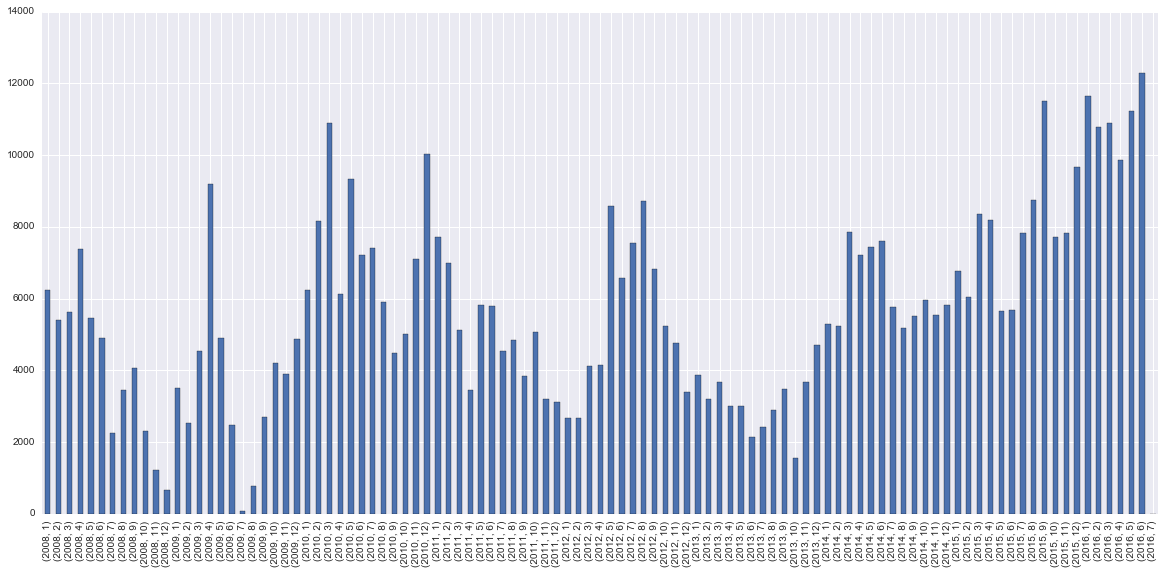

It doesn't look like the dip in the number of applications in 2013 was because of missing data - data was collected over all 12 months


In [9]:
%matplotlib inline
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
perm_data.groupby([pd.DatetimeIndex(perm_data['DECISION_DATE']).year, pd.DatetimeIndex(perm_data['DECISION_DATE']).month]).count()['CASE_NUMBER'][3:].plot(kind="bar")
plt.show()
print("It doesn't look like the dip in the number of applications in 2013 was because of missing data - data was collected over all 12 months")

In [ ]:
#Matches = timetakenest[pd.DatetimeIndex(perm_data['DECISION_DATE']).year == 2008] < 800
#timetakenest[Matches[Matches].index].mean()
#timetaken[pd.DatetimeIndex(perm_data['DECISION_DATE']).year == 2016].median()

#perm_data.head()

timetaken[pd.DatetimeIndex(perm_data['DECISION_DATE']).year == 2015].std()

176
mean days to process an application by 2016, this is only data until June
66728
 number of apps processed till June 2016


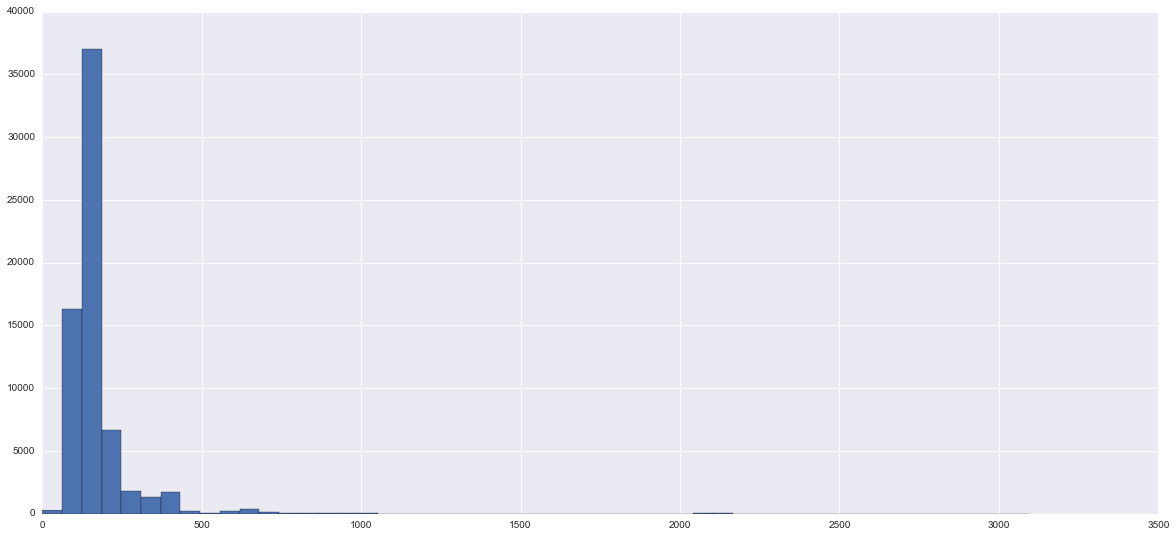

286
mean days to process an application by 2015
309 days 04:41:26.346210
mean days to process an application by June 2015
40692
applications processed by June 2015
269 days 14:53:32.548784
mean days to process an application between July and December 2015
53296
applications processed between July and December 2015


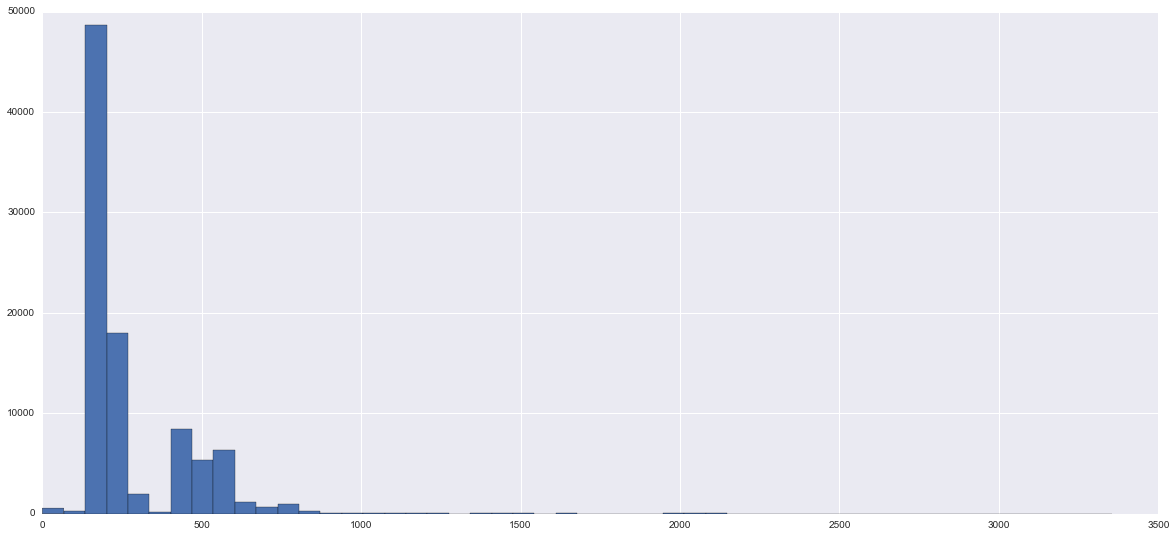

389.787560532
mean estimated days to process an application by 2008
977.054176797
mean estimated days to process an application by 2009
805.13298278
mean estimated days to process an application by 2010
612.33494705
mean estimated days to process an application by 2011
476.413552619
mean estimated days to process an application by 2012
708.986256579
mean estimated days to process an application by 2013
763.013011277
mean estimated days to process an application by 2014
836.979720815
mean estimated days to process an application by 2015
741.802721496
mean estimated days to process an application by 2016
Case Number is quite off


In [10]:
timetaken = perm_data['DECISION_DATE'] - perm_data['CASE_RECEIVED_DATE']
case_numbers_dec = perm_data['DECISION_DATE'].dt.year.astype(str).str[2:4]+perm_data['DECISION_DATE'].dt.strftime('%j')
case_numbers_rec = perm_data['CASE_NUMBER'].str[2:7].astype(int)
timetakenest = case_numbers_dec.astype(int) - case_numbers_rec
#print(timetakenest)
#print(timetaken)

#print(timetaken.astype('timedelta64[D]').astype(int))
print(timetaken[pd.DatetimeIndex(perm_data['DECISION_DATE']).year == 2016].mean().days)
print("mean days to process an application by 2016, this is only data until June")

#print(timetakenest[pd.DatetimeIndex(perm_data['DECISION_DATE']).year == 2016].mean())
#print("mean estimated days to process an application by 2016")

print(len(timetakenest[pd.DatetimeIndex(perm_data['DECISION_DATE']).year == 2016]))
print(" number of apps processed till June 2016")

plt.hist(timetaken[pd.DatetimeIndex(perm_data['DECISION_DATE']).year == 2016].astype('timedelta64[D]').astype(int), 50)
plt.show()

print(timetaken[pd.DatetimeIndex(perm_data['DECISION_DATE']).year == 2015].mean().days)
print("mean days to process an application by 2015")

#print(timetakenest[pd.DatetimeIndex(perm_data['DECISION_DATE']).year == 2015].mean())
#print("mean estimated days to process an application by 2015")

print(timetaken[np.logical_and(pd.DatetimeIndex(perm_data['DECISION_DATE']).year == 2015, pd.DatetimeIndex(perm_data['DECISION_DATE']).month < 7)].mean())
print("mean days to process an application by June 2015")

print(len(timetaken[np.logical_and(pd.DatetimeIndex(perm_data['DECISION_DATE']).year == 2015, pd.DatetimeIndex(perm_data['DECISION_DATE']).month < 7)]))
print("applications processed by June 2015")

print(timetaken[np.logical_and(pd.DatetimeIndex(perm_data['DECISION_DATE']).year == 2015, pd.DatetimeIndex(perm_data['DECISION_DATE']).month > 6)].mean())
print("mean days to process an application between July and December 2015")

print(len(timetaken[np.logical_and(pd.DatetimeIndex(perm_data['DECISION_DATE']).year == 2015, pd.DatetimeIndex(perm_data['DECISION_DATE']).month > 6)]))
print("applications processed between July and December 2015")

#stats tests? - difference over last 3 quarters - increase in no of apps processed and decrease in time

plt.hist(timetaken[pd.DatetimeIndex(perm_data['DECISION_DATE']).year == 2015].astype('timedelta64[D]').astype(int), 50)
plt.show()

yrs = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
for y in yrs:
    print(timetakenest[pd.DatetimeIndex(perm_data['DECISION_DATE']).year == y].mean())
    print("mean estimated days to process an application by " + str(y))

print("Case Number is quite off")

#timetaken[pd.DatetimeIndex(perm_data['DECISION_DATE']).year == 2014].isnull().sum()



#denied_15 = perm_15[perm_15['CASE_STATUS'].str.contains("Denied")]
#accepted_15 = perm_15[perm_15['CASE_STATUS'].str.contains("Certified")]

#num_days_denied = (denied_15['DECISION_DATE'] - denied_15['CASE_RECEIVED_DATE']).astype('timedelta64[D]').astype(int)
#print('It took on average ' + str(num_days_denied.mean()) +' days to deny an application')
#print('It took on median ' + str(num_days_denied.median()) +' days to deny an application')

#data = [go.Histogram(x=num_days_denied)]
#layout = go.Layout(title='Distribution of number of days to deny an application', xaxis=dict(title='No of days'),yaxis=dict(title='Frequency'))
#fig = go.Figure(data=data, layout=layout)
#py.iplot(fig)


In [11]:


plt.scatter(case_numbers_rec.astype(int), h1b_15['CASE_NUMBER'].str[2:7].astype(int))
plt.xlabel('Case Received Date')
plt.ylabel('Case Number')
plt.show()

disc = case_numbers_rec.astype(int) - h1b_15['CASE_NUMBER'].str[2:7].astype(int)
plt.hist(filter(lambda x : x > 0, disc), 50)
plt.show()
#map(lambda disc: disc<30, seq).index(True)
#[x for x in a if x<=4]
print(len(filter(lambda x : x < 0, disc)))
#print(disc.argmin())
print(h1b_15.loc[disc.argmin()])

num_days = (h1b_15['DECISION_DATE'] - h1b_15['CASE_RECEIVED_DATE']).astype('timedelta64[D]').astype(int)
plt.hist(num_days,50)
plt.show()

h1b_15_cert = h1b_15[h1b_15['CASE_STATUS'].str.contains('Denied') == False]
num_days_cert = (h1b_15_cert['DECISION_DATE'] - h1b_15_cert['CASE_RECEIVED_DATE']).astype('timedelta64[D]').astype(int)
plt.hist(num_days_cert,50)
plt.show()
h1b_15.iloc[num_days_cert.argmax()]
plt.hist(filter(lambda x : x < 700, num_days_cert),50)
plt.show()

NameError: name 'h1b_15' is not defined

In [ ]:


noapps = []
noappsdenied = []
noappsaccepted = []
for k in keys:
    noapps.append(len(perm_data_2.loc[k]))
    noappsdenied.append(len(perm_data_2.loc[k][perm_data_2.loc[k]['CASE_STATUS'].str.startswith("D")]))
    noappsaccepted.append(len(perm_data_2.loc[k][perm_data_2.loc[k]['CASE_STATUS'].str.startswith("C")]))
    
#print (range(2008:2016))
print noapps
print noappsdenied
print noappsaccepted

years = np.linspace(2008, 2016, 9).tolist()
print(years)

trace1 = Scatter(x = years,y = noapps,mode = 'lines+markers', name = 'total number of apps')
trace2 = Scatter(x = years,y = noappsdenied,mode = 'lines+markers', name = 'number of apps denied')
trace3 = go.Scatter(x = years,y = noappsaccepted,mode = 'lines+markers', name = 'number of apps accepted')
perm_data_2.groupby([pd.DatetimeIndex(perm_data_2['DECISION_DATE']).year]).count()['CASE_NUMBER'][1:]
trace5 = go.Scatter(x = years,y = perm_data_2.groupby([pd.DatetimeIndex(perm_data_2['DECISION_DATE']).year]).count()['CASE_NUMBER'][1:],mode = 'lines+markers', name = 'number of apps processed')

py.iplot([trace1, trace2, trace3, trace5], filename='trend in apps over years')



In [ ]:
trace4 = go.Scatter(x = years,y = np.array(noappsaccepted).astype(float)/np.array(noapps),mode = 'lines+markers', name = 'percentage of apps accepted')
py.iplot([trace4], filename='trend in percentage over years')
# do we have data for all 4 quarters?? in 2013?

In [ ]:
# Read only 2015 data
perm_15 = pd.read_pickle('perm')
perm_all_15 = pd.read_pickle('perm_all')
# Null values

print(len(perm_15))
print(perm_15.isnull().sum())
perm_15 = perm_15.dropna(how='any')
print(len(perm_15.dropna(how='any')))
#perm_15.isnull().sum().argmax()
# keeps the original row values from the csv file just deletes those rowws in between

In [ ]:
print("We don't want the cases where they withdrew the application because they were not processed and it doesn't make sense to take them into account.")
perm_15 = perm_15[perm_15['CASE_STATUS'].str.contains('Withdrawn') == False]
print(len(perm_15))

print(str(len(perm_15[perm_15['CASE_STATUS'].str.contains("Certified")])) + " applications were accepted and " + str(len(perm_15[perm_15['CASE_STATUS'].str.contains("Denied")]))+ " applications were denied.")

#case_numbers_rec = perm_15['CASE_RECEIVED_DATE'].dt.year.astype(str).str[2:4]+h1b_15['CASE_RECEIVED_DATE'].dt.strftime('%j')
perm_15['CASE_NUMBER'].str[2:7].astype(int)

### Why were some applications denied? ###

In [ ]:
denied_15 = perm_15[perm_15['CASE_STATUS'].str.contains("Denied")]
accepted_15 = perm_15[perm_15['CASE_STATUS'].str.contains("Certified")]

num_days_denied = (denied_15['DECISION_DATE'] - denied_15['CASE_RECEIVED_DATE']).astype('timedelta64[D]').astype(int)
print('It took on average ' + str(num_days_denied.mean()) +' days to deny an application')
print('It took on median ' + str(num_days_denied.median()) +' days to deny an application')

data = [go.Histogram(x=num_days_denied)]
layout = go.Layout(title='Distribution of number of days to deny an application', xaxis=dict(title='No of days'),yaxis=dict(title='Frequency'))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

#denied_15["WAGE_OFFER_FROM_9089"].astype(float)
#sns.distplot(denied_15["WAGE_OFFER_FROM_9089"].astype(int), kde=False, bins=20)

#denied_15["WAGE_OFFER_FROM_9089"].astype(float)
#denied_15["PW_LEVEL_9089"].str[6:]
#.astype(int)
#import roman;
#n=roman.fromRoman("X"); #n becomes 10


In [ ]:
num_days_accepted = (accepted_15['DECISION_DATE'] - accepted_15['CASE_RECEIVED_DATE']).astype('timedelta64[D]').astype(int)
data = [go.Histogram(x=num_days_accepted)]
layout = go.Layout(title='Distribution of number of days to accept an application', xaxis=dict(title='No of days'),yaxis=dict(title='Frequency'))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


In [ ]:
trace1 = go.Histogram(x=num_days_accepted, name='accepted visas',marker=dict(color='rgb(0, 0, 255)'),opacity=0.5)
trace2 = go.Histogram(x=num_days_denied, name='denied visas',marker=dict(color='rgb(200, 0, 200)'),opacity=0.5)
data = [trace1, trace2]
layout = go.Layout(title='Distribution of number of days to accept an application', xaxis=dict(title='No of days'),yaxis=dict(title='Frequency'), barmode='overlay')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


In [ ]:
#Some zip codes have 6+ 4 digits instead of 6, so take the first 6
#Some Job Postal Codes are not right - they are the state name, so set them to be the employer postal code
print(perm_15['JOB_INFO_WORK_POSTAL_CODE'].loc[pd.to_numeric(perm_15['JOB_INFO_WORK_POSTAL_CODE'].str[:5], errors='coerce').isnull()])
perm_15['JOB_INFO_WORK_POSTAL_CODE'].loc[pd.to_numeric(perm_15['JOB_INFO_WORK_POSTAL_CODE'].str[:5], errors='coerce').isnull()] = perm_15['EMPLOYER_POSTAL_CODE'].loc[pd.to_numeric(perm_15['JOB_INFO_WORK_POSTAL_CODE'].str[:5], errors='coerce').isnull()]

# Job Postal Code is probably right, but older files only have Employer Postal Code - Is this the same as the Job Postal Code?
#Some Emplyer Postal Codes are keyed in wrongly, Some employers are outside the states but the jobs are in the states - so swap the job postal codes here
# Bot the older files have Job Work City and State so I can convert those to Postal Codes, but it would be easier to just use the employer postal codes if these are accurate

print(perm_15['EMPLOYER_POSTAL_CODE'].loc[pd.to_numeric(perm_15['EMPLOYER_POSTAL_CODE'].str[:5], errors='coerce').isnull()])
perm_15['EMPLOYER_POSTAL_CODE'].loc[pd.to_numeric(perm_15['EMPLOYER_POSTAL_CODE'].str[:5], errors='coerce').isnull()] = perm_15['JOB_INFO_WORK_POSTAL_CODE'].loc[pd.to_numeric(perm_15['EMPLOYER_POSTAL_CODE'].str[:5], errors='coerce').isnull()]

# Convert all postal codes to int
perm_15['EMPLOYER_POSTAL_CODE']= perm_15['EMPLOYER_POSTAL_CODE'].str[:5]
perm_15['JOB_INFO_WORK_POSTAL_CODE']= perm_15['JOB_INFO_WORK_POSTAL_CODE'].str[:5]

perm_15['EMPLOYER_POSTAL_CODE'] = perm_15['EMPLOYER_POSTAL_CODE'].astype(int)
perm_15['JOB_INFO_WORK_POSTAL_CODE'] = perm_15['JOB_INFO_WORK_POSTAL_CODE'].astype(int)

#print(perm_15['JOB_INFO_WORK_POSTAL_CODE'])
#print(perm_15['EMPLOYER_POSTAL_CODE'])
spc = perm_15['JOB_INFO_WORK_POSTAL_CODE']-perm_15['EMPLOYER_POSTAL_CODE']
print("Employer Location indicates Job Location " + str((float(len(filter(lambda x : x == 0, spc)))/len(spc))*100) + " % of the time.")


In [ ]:
data = [go.Histogram(x=spc)]
layout = go.Layout(title='Distribution of how different employer postal codes and job postal codes are', xaxis=dict(title='Difference in postal codes'),yaxis=dict(title='Frequency'))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [ ]:
# I think states could be better than postal codes for visualization
gbstates = perm_15.groupby(['JOB_INFO_WORK_STATE']).size().reset_index(name='count')
# only keep 50 states to make plotting maps easier
todrop = [ 'FEDERATED STATES OF MICRONESIA', 'GUAM', 'MARSHALL ISLANDS','NORTHERN MARIANA ISLANDS', 'PUERTO RICO', 'VIRGIN ISLANDS']
# Why is UTAH being a problem?
#todrop = ['UTAH', 'FEDERATED STATES OF MICRONESIA', 'GUAM', 'MARSHALL ISLANDS','NORTHERN MARIANA ISLANDS', 'PUERTO RICO', 'VIRGIN ISLANDS']

for d in todrop:
    gbstates = gbstates[gbstates['JOB_INFO_WORK_STATE'] != d]
gbstates.index = range(len(gbstates))

# Create state abbreviations
gbstates['JOB_INFO_WORK_STATE_ABBR'] = ""

for i, p in enumerate(gbstates['JOB_INFO_WORK_STATE_ABBR']):
    gbstates['JOB_INFO_WORK_STATE_ABBR'][i] = str(us.states.lookup(unicode(gbstates['JOB_INFO_WORK_STATE'][i])).abbr) 
#print(gbstates)
#us.states.lookup(unicode(gbstates['JOB_INFO_WORK_STATE'][44])).abbr


In [ ]:
#sns.color_palette("Blues")
#sns.palplot(sns.cubehelix_palette(15, start=0, rot=0, dark=0.2, light=1)).fig.show()

scl = map(str,(np.array(sns.cubehelix_palette(15, start=0, rot=0, dark=0.2, light=0.95))*255).astype(int))
scl = [w.replace('[ ','rgb(') for w in scl]
scl = [w.replace('[','rgb(') for w in scl]
scl= [w.replace(']',')') for w in scl]
scl= [w.replace('  ',' ') for w in scl]
scl= [w.replace(' ',',') for w in scl]
fr = np.linspace(0.0, 1.0, 15).tolist()

clrscl = [list(a) for a in zip(fr, scl)]
#print clrscl

gbstates['text'] = gbstates['JOB_INFO_WORK_STATE_ABBR'] + '<br>' +\
    'Number of applications '+ gbstates['count'].astype(str)

data = [ dict(type='choropleth',colorscale = clrscl,autocolorscale = False,locations = gbstates['JOB_INFO_WORK_STATE_ABBR'],
        z = gbstates['count'],
        locationmode = 'USA-states',
        text = gbstates['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Number of applications"
        )
    ) ]

layout = dict(title = 'Number of Applications by State<br>(Hover for breakdown)',geo = dict(scope='usa',projection=dict( type='albers usa' ),showlakes = True,lakecolor = 'rgb(255, 255, 255)'))
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='d3-cloropleth-map')

In [ ]:
from iso3166 import countries
perm_15['COUNTRY_OF_CITIZENSHIP']
gbcountries = perm_15.groupby(['COUNTRY_OF_CITIZENSHIP']).size().reset_index(name='count')
# only keep 50 states to make plotting maps easier
#todrop = [ 'FEDERATED STATES OF MICRONESIA', 'GUAM', 'MARSHALL ISLANDS','NORTHERN MARIANA ISLANDS', 'PUERTO RICO', 'VIRGIN ISLANDS']
# Why is UTAH being a problem?
#todrop = ['UTAH', 'FEDERATED STATES OF MICRONESIA', 'GUAM', 'MARSHALL ISLANDS','NORTHERN MARIANA ISLANDS', 'PUERTO RICO', 'VIRGIN ISLANDS']

#for d in todrop:
#    gbstates = gbstates[gbstates['JOB_INFO_WORK_STATE'] != d]
#gbstates.index = range(len(gbstates))

# Create state abbreviations
gbcountries['COUNTRY_OF_CITIZENSHIP_ABBR'] = ""
for i, p in enumerate(gbcountries['COUNTRY_OF_CITIZENSHIP']):
    gbcountries['COUNTRY_OF_CITIZENSHIP_ABBR'][i] = countries.get(p).alpha3
    print gbcountries['COUNTRY_OF_CITIZENSHIP_ABBR'][i]
#for i, p in enumerate(gbstates['JOB_INFO_WORK_STATE_ABBR']):
#    gbstates['JOB_INFO_WORK_STATE_ABBR'][i] = str(us.states.lookup(unicode(gbstates['JOB_INFO_WORK_STATE'][i])).abbr) 
#print(gbstates)
#us.states.lookup(unicode(gbstates['JOB_INFO_WORK_STATE'][44])).abbr
#gbcountries


In [ ]:
countries.get('BOLIVIA')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
print df['CODE']
data = [ dict(
        type = 'choropleth',
        locations = df['CODE'],
        z = df['GDP (BILLIONS)'],
        text = df['COUNTRY'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            )
        ),
        tick0 = 0,
        zmin = 0,
        dtick = 1000,
        colorbar = dict(
            autotick = False,
            tickprefix = '$',
            title = 'GDP<br>Billions US$'
        ),
    ) ]

layout = dict(
    title = '2014 Global GDP<br>Source: \
<a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
CIA World Factbook</a>',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
url = py.plot(fig, filename='d3-world-map')

In [ ]:

#pd.set_option('display.max_columns', 130)


plt.scatter(case_numbers_rec.astype(int), h1b_15['CASE_NUMBER'].str[2:7].astype(int))
plt.xlabel('Case Received Date')
plt.ylabel('Case Number')
plt.show()

disc = case_numbers_rec.astype(int) - h1b_15['CASE_NUMBER'].str[2:7].astype(int)
plt.hist(filter(lambda x : x > 0, disc), 50)
plt.show()
#map(lambda disc: disc<30, seq).index(True)
#[x for x in a if x<=4]
print(len(filter(lambda x : x < 0, disc)))
#print(disc.argmin())
print(h1b_15.loc[disc.argmin()])

num_days = (h1b_15['DECISION_DATE'] - h1b_15['CASE_RECEIVED_DATE']).astype('timedelta64[D]').astype(int)
plt.hist(num_days,50)
plt.show()

h1b_15_cert = h1b_15[h1b_15['CASE_STATUS'].str.contains('Denied') == False]
num_days_cert = (h1b_15_cert['DECISION_DATE'] - h1b_15_cert['CASE_RECEIVED_DATE']).astype('timedelta64[D]').astype(int)
plt.hist(num_days_cert,50)
plt.show()
h1b_15.iloc[num_days_cert.argmax()]
plt.hist(filter(lambda x : x < 700, num_days_cert),50)
plt.show()

In [ ]:
type(h1b_15.iloc[0,1])

In [ ]:
num_days = (h1b_15['DECISION_DATE'] - h1b_15['CASE_RECEIVED_DATE']).astype('timedelta64[D]').astype(int)
plt.hist(num_days,50)
plt.show()

In [ ]:
h1b_15_cert = h1b_15[h1b_15['CASE_STATUS'].str.contains('Denied') == False]
num_days_cert = (h1b_15_cert['DECISION_DATE'] - h1b_15_cert['CASE_RECEIVED_DATE']).astype('timedelta64[D]').astype(int)
plt.hist(num_days_cert,50)
plt.show()
h1b_15.iloc[num_days_cert.argmax()]
plt.hist(filter(lambda x : x < 700, num_days_cert),50)
plt.show()

In [ ]:
h1b_15["PW_SOC_TITLE"]

In [ ]:
h1b_15["PW_JOB_TITLE"]

In [ ]:
#boxplot stuff

trace0 = Box(y=low,name = 'Low Experience',boxmean=True, boxpoints=False)
trace1 = Box(y=high, name = 'High Experience',boxmean=True, boxpoints=False)
fig12 = [trace0, trace1]
iplot(fig12)

#float(np.percentile(timeaccep, [25]))#, 50, 75])
#yy = [float(np.percentile(timeaccep, [25])), float(np.percentile(timeaccep, [50])), float(np.percentile(timeaccep, [50])), np.median(timeaccep), float(np.percentile(timeaccep, [75])), float(np.percentile(timeaccep, [75])), float(np.percentile(timeaccep, [75]))] 
#yy

#jitter=0.5,whiskerwidth=0.2,fillcolor=cls,marker=dict(size=1,),line=dict(width=1),

#from plotly.tools import FigureFactory as FF
#fig = FF.create_violin(timeaccep, colors='#604d9e')
#iplot(fig, filename='One Violin')

#sns.violinplot([timeaccep])#, timeden])
#plt.show()
#sns.violinplot(x = "CASE_STATUS", y="TIME_TAKEN",data = AA)
#np.median(perm_data_15[perm_data_15['CASE_STATUS'].str.startswith("C")]['TIME_TAKEN'])
#gbexper = perm_data_15.groupby(['PW_LEVEL_9089']).count()

#low = gbexper.get_group('Level I')['TIME_TAKEN'].reset_index()['TIME_TAKEN'].tolist() + gbexper.get_group('Level II')['TIME_TAKEN'].reset_index()['TIME_TAKEN'].tolist()
#high = gbexper.get_group('Level III')['TIME_TAKEN'].reset_index()['TIME_TAKEN'].tolist() + gbexper.get_group('Level IV')['TIME_TAKEN'].reset_index()['TIME_TAKEN'].tolist()

#trace0 = Box(y=low,name = 'Low Experience',boxmean=True, boxpoints=False)
#trace1 = Box(y=high, name = 'High Experience',boxmean=True, boxpoints=False)
#fig12 = [trace0, trace1]
#iplot(fig12)

# grouped = crime_df.groupby(['TimeOfDay','Date']).count()
#    ct_unwrapped = grouped.reset_index()
#    fig = plt.figure(figsize=(12,6))
#    sns.violinplot(x = "TimeOfDay", y="CrimeCodeNo",data = ct_unwrapped)
#    plt.ylabel('Number of crimes in time period',fontsize = 25)
#    plt.xlabel('Frequency',fontsize = 25)
#    plt.legend()
#    ax = plt.gca()
#    for tick in ax.xaxis.get_major_ticks():
#        tick.label.set_fontsize(15) 
#    for tick in ax.yaxis.get_major_ticks():
#        tick.label.set_fontsize(15) 


#x_data = ['Applications that were accepted', 'Applications that were denied']
#y_data = [timeaccep, timeden]
#colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)']

#traces = []

#for xd, yd, cls in zip(x_data, y_data, colors):
#    traces.append(Box(y=yd,name=xd,boxpoints='all',jitter=0.5,whiskerwidth=0.2,fillcolor=cls,marker=dict(size=1,),line=dict(width=1),))
#    layout = Layout(title='Distribution of time taken for Accepted vs Denied Applications',#
                    #yaxis=dict(autorange=True,showgrid=True,zeroline=True,dtick=5,gridcolor='rgb(255, 255, 255)',gridwidth=1,zerolinecolor='rgb(255, 255, 255)',zerolinewidth=2,),
#                   margin=dict(l=40,r=30,b=80,t=100,),paper_bgcolor='rgb(243, 243, 243)',plot_bgcolor='rgb(243, 243, 243)',showlegend=False)
#
#fig =Figure(data=traces, layout=layout)
#iplot(fig)